## - Feature Selection Techniques:

* ### Filter methods:
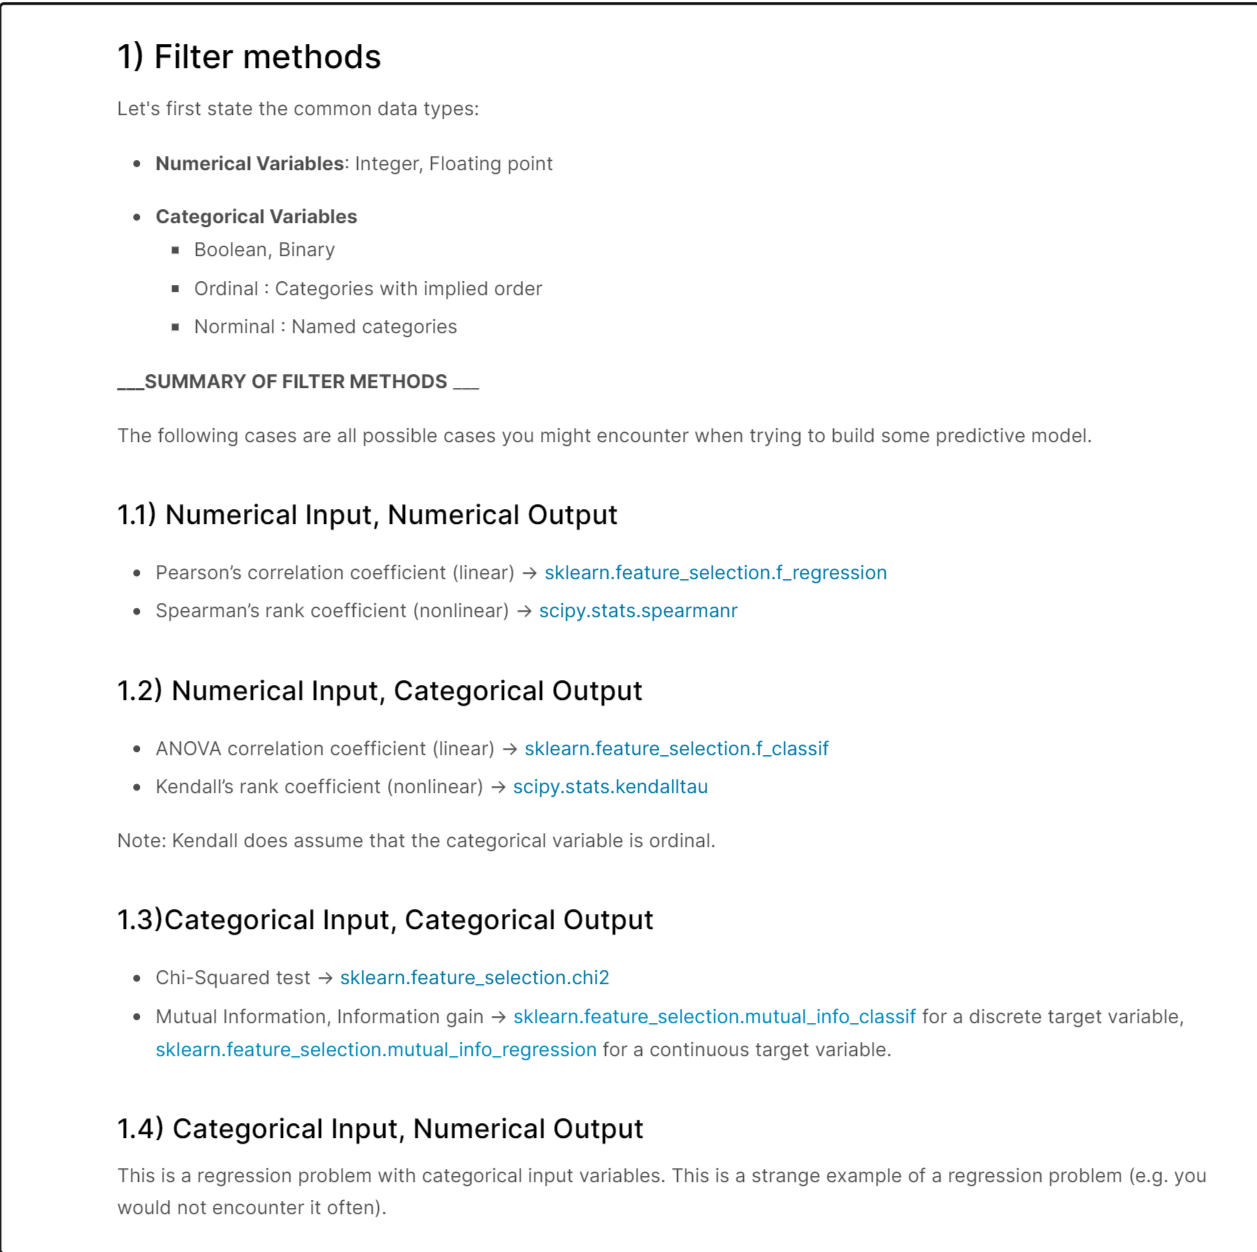

#### 1.  Numerical Input, Numerical output:

##### - Linear:

###### - Person's Correaltion coefficient


In [1]:
# pip install mlxtend

In [29]:
# import packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import fetch_california_housing, load_iris,load_wine, load_breast_cancer,load_boston
from sklearn.feature_selection import SelectFpr, f_classif , SelectKBest, chi2, mutual_info_classif, mutual_info_regression,RFECV, SelectFromModel
from sklearn.metrics import get_scorer_names
from sklearn.linear_model import Lasso

from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from scipy.stats import spearmanr ,f_oneway, kendalltau

In [3]:
# Load the california Housing Prices dataset
housing = fetch_california_housing()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
df["target"] = housing["target"]

# Print the first 5 rows of the dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


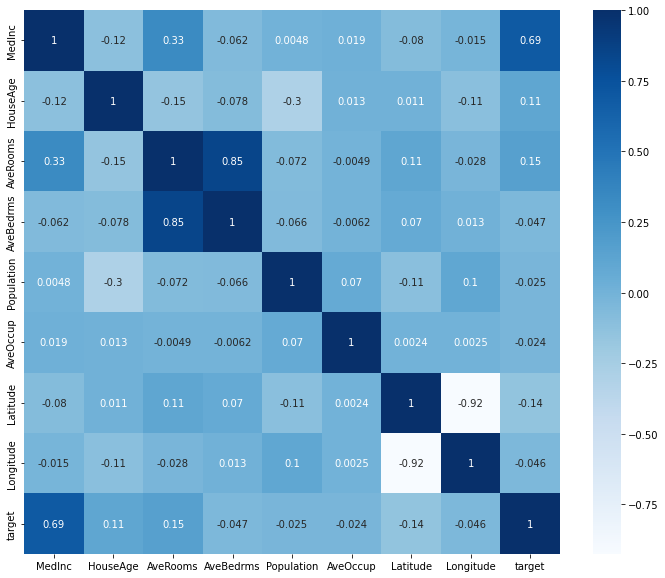

In [4]:
# visulize the corr. 
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [5]:
#Correlation with output variable
cor_target = abs(cor["target"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

MedInc    0.688075
target    1.000000
Name: target, dtype: float64

##### - Non-Linear:

###### - Spearman's rank coefficient

In [6]:
# Load data
X = df.drop("target", axis=1)
y = df["target"]

# Compute the Spearman's rank coefficient for each feature
coefficients = []
for feature in X.columns:
    coef, p_value = spearmanr(X[feature], y)
    coefficients.append((feature, coef))

# Sort the features by their coefficient
coefficients.sort(key=lambda x: x[1], reverse=True)

# Select the top n features
n = 4
selected_features = [x for x in coefficients[:n]]

# Print the selected features and the correlation
print(selected_features)
    

[('MedInc', 0.6767781095942506), ('AveRooms', 0.26336668772954447), ('HouseAge', 0.07485485302251019), ('Population', 0.0038387551282557182)]


#### 2.  Numerical Input, Categorical output:

##### - Linear:

###### - ANOVA correlation coefficient

In [7]:
# Load the Iris dataset
iris = load_iris()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Separate the feature matrix and the label vector
X = df.drop("target", axis=1)
y = df["target"]

# Dictionary to store the F-scores and p-values of the features
feature_scores = {}

# For each feature, compute the ANOVA F-value and p-value between the feature and the label
for feature in X.columns:
    f, p = f_oneway(X[feature], y)
    feature_scores[feature] = (f, p)
    print((f, p))

# Select the features with a p-value below the threshold (0.05)
selected_features = [feature for feature, (fscore, pvalue) in feature_scores.items() if pvalue < 0.05]

print(f"Selected {len(selected_features)} features: {selected_features}")

(2593.3021244672414, 4.397613931895758e-149)
(737.2872570149498, 1.418242288711535e-82)
(301.25651866812996, 4.0393021870189466e-47)
(4.759876993399074, 0.029911755011951844)
Selected 4 features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# Calculate Kendall's rank correlation coefficient for each feature
kendalls_tau = []
for feature in df.columns:
    kt, p_value = kendalltau(df[feature], y)
    kendalls_tau.append((feature, kt))



# Sort the features by Kendall's tau
kendalls_tau = sorted(kendalls_tau, key=lambda x: x, reverse=True)

    
# Select the top n features
n = 4
selected_features = [x for x in kendalls_tau[:n]]

# Print the sorted list of Kendall's tau values
print(selected_features)

[('target', 1.0), ('sepal width (cm)', -0.3376143828382626), ('sepal length (cm)', 0.6704444444444444), ('petal width (cm)', 0.8396873532481234)]


### 3. Categorical Input, Categorical Output:
Chi-Squared test 

Feature name: petal length (cm) , chi squared values: 116.31261309207025
Feature name: petal width (cm) , chi squared values: 67.04836020011118
Feature name: sepal length (cm) , chi squared values: 10.817820878494002
Feature name: sepal width (cm) , chi squared values: 3.7107283035324965


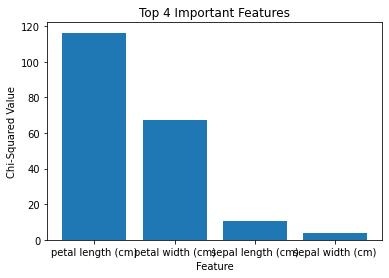

In [10]:

# Select the top N features using chi-square test
N = 4
selector = SelectKBest(chi2, k=N)
selector.fit(X, y)

# Get the selected features and their chi-square values
selected_features = X.columns[selector.get_support()]
chi_squared_values = selector.scores_[selector.get_support()]

# Sort the features by chi-square value
selected_features = [x for _, x in sorted(zip(chi_squared_values, selected_features), reverse=True)]
chi_squared_values = sorted(chi_squared_values, reverse=True)

for feature, chi in zip(selected_features, chi_squared_values):
    print('Feature name: {} , chi squared values: {}'.format(feature, chi))

# Visualize the results

'''
 align: Alignment of the bars to the *x* coordinates: 
    - 'center': Center the base on the *x* positions.
    - 'edge': Align the left edges of the bars with the *x* positions.
'''

plt.bar(range(N), chi_squared_values, align='center') 
plt.xticks(range(N), selected_features)
plt.xlabel('Feature')
plt.ylabel('Chi-Squared Value')
plt.title('Top {} Important Features'.format(N))
plt.show()


#####  Mutual Information Classification

In [11]:
#Load the wine dataset
wine = load_wine()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# Print the first 5 rows of the dataframe
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [12]:
# Separate the feature matrix and the label vector
X = df.drop("target", axis=1)
y = df["target"]

# Select the top N features using mutual information
N = 4
selector = SelectKBest(mutual_info_classif, k=N)
selector.fit(X, y)

# Get the selected features and their mutual information values
selected_features = X.columns[selector.get_support()]
mutual_info_values = selector.scores_[selector.get_support()]

mutual_info_values = sorted(mutual_info_values, reverse=True)

# Print the selected features and their mutual information values
for feature, mi in zip(selected_features, mutual_info_values):
    print('Feature name: {} , mutaul information: {}'.format(feature, mi))


Feature name: flavanoids , mutaul information: 0.6664470392300188
Feature name: color_intensity , mutaul information: 0.5617548816009073
Feature name: od280/od315_of_diluted_wines , mutaul information: 0.5547900472494247
Feature name: proline , mutaul information: 0.5079820576138674


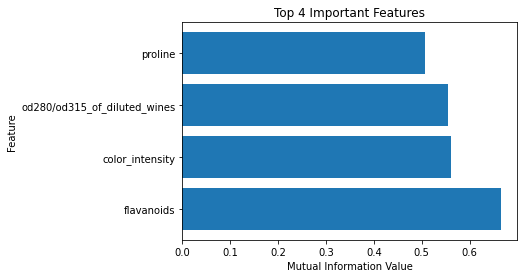

In [13]:
# Visualize the results
plt.barh(range(N), mutual_info_values, align='center')
plt.yticks(range(N), selected_features)
plt.ylabel('Feature')
plt.xlabel('Mutual Information Value')
plt.title('Top {} Important Features'.format(N))
plt.show()

#####  Mutual Information Regression

In [14]:
# Load the california Housing Prices dataset
housing = fetch_california_housing()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
df["target"] = housing["target"]

# Print the first 5 rows of the dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [15]:
# Separate the feature matrix and the label vector
X = df.drop("target", axis=1)
y = df["target"]

# Select the top N features using mutual information
N = 4
selector = SelectKBest(mutual_info_regression, k=N)
selector.fit(X, y)

# Get the selected features and their mutual information values
selected_features = X.columns[selector.get_support()]
mutual_info_values = selector.scores_[selector.get_support()]

mutual_info_values = sorted(mutual_info_values, reverse=True)

# Print the selected features and their mutual information values
for feature, mi in zip(selected_features, mutual_info_values):
    print('Feature name: {} , mutaul information: {}'.format(feature, mi))

Feature name: MedInc , mutaul information: 0.40250177982380286
Feature name: AveRooms , mutaul information: 0.3873458303539943
Feature name: Latitude , mutaul information: 0.37009960492434324
Feature name: Longitude , mutaul information: 0.10306367284267992


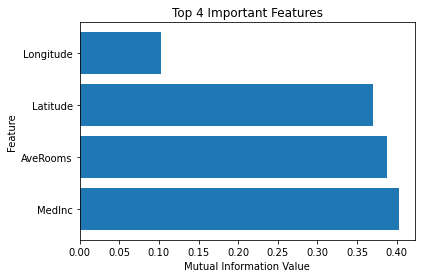

In [16]:
# Visualize the results
plt.barh(range(N), mutual_info_values, align='center')
plt.yticks(range(N), selected_features)
plt.ylabel('Feature')
plt.xlabel('Mutual Information Value')
plt.title('Top {} Important Features'.format(N))
plt.show()

#### 2. Wrapper Methods:
##### - Forward selection:

In [17]:
#Load the wine dataset
wine = load_wine()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target

# Print the first 5 rows of the dataframe
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
# Load the breast cancer dataset
X, y = load_breast_cancer(return_X_y=True)

# Set the parameters for the feature selector
k = 5  # Number of features to select
forward = True  # Perform forward selection , forward = False  # Perform backward selection


# Create the feature selector
sfs = SequentialFeatureSelector(KNeighborsClassifier(),
                                    k_features=k,
                                    forward=forward,
                                    scoring='accuracy')

# Fit the feature selector to the data
sfs.fit(X, y)

# Get the indices of the selected features
indices = sfs.k_feature_idx_

# Get the names of the selected features
feature_names = load_breast_cancer()['feature_names']
selected_features = [feature_names[i] for i in indices]
print(f'Selected features: {selected_features}')

Selected features: ['mean smoothness', 'mean concave points', 'worst radius', 'worst smoothness', 'worst concavity']


In [19]:
sfs.get_metric_dict()

{1: {'feature_idx': (20,),
  'cv_scores': array([0.84210526, 0.89473684, 0.92105263, 0.92982456, 0.94690265]),
  'avg_score': 0.9069243906225741,
  'feature_names': ('20',),
  'ci_bound': 0.0469521619118674,
  'std_dev': 0.036530377086690866,
  'std_err': 0.018265188543345433},
 2: {'feature_idx': (20, 26),
  'cv_scores': array([0.92105263, 0.92982456, 0.95614035, 0.93859649, 0.94690265]),
  'avg_score': 0.9385033379909953,
  'feature_names': ('20', '26'),
  'ci_bound': 0.0158614454596031,
  'std_dev': 0.01234074343300536,
  'std_err': 0.006170371716502679},
 3: {'feature_idx': (20, 24, 26),
  'cv_scores': array([0.92105263, 0.93859649, 0.96491228, 0.93859649, 0.94690265]),
  'avg_score': 0.9420121099208197,
  'feature_names': ('20', '24', '26'),
  'ci_bound': 0.018276166959486747,
  'std_dev': 0.014219478795940665,
  'std_err': 0.0071097393979703315},
 4: {'feature_idx': (7, 20, 24, 26),
  'cv_scores': array([0.92105263, 0.93859649, 0.97368421, 0.93859649, 0.94690265]),
  'avg_score':

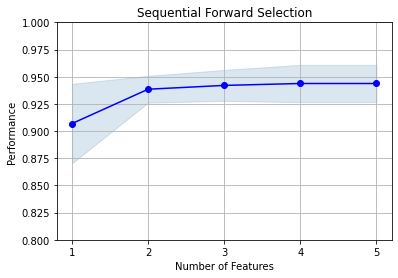

In [20]:
# visulize the important features
fig1 = plot_sfs(sfs.get_metric_dict())

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()


### - reference. http://rasbt.github.io/mlxtend/

* ####  Recursive Feature Elimination with Cross-Validated (RFECV):

In [21]:
# Load the california Housing Prices dataset
housing = fetch_california_housing()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
df["target"] = housing["target"]

# Print the first 5 rows of the dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
# get_scorer_names() # to get metrics name

In [23]:
# Load data
X = df.drop("target", axis=1)
y = df["target"]


# Set the parameters for the feature selector
model = RandomForestRegressor()
cv = 5 # cross-validation split
scoring = 'neg_mean_squared_error' # metric
k = 5 # feature to select 
step = 1 # number of features to remove at each iteration.

# Create selector
rfecv = RFECV(estimator=model, step=step, cv=cv,scoring=scoring,min_features_to_select=k)  # selects the features automatically
rfecv = rfecv.fit(X, y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X.columns[rfecv.support_])
best_features = list(X.columns[rfecv.support_])


Optimal number of features : 8
Best features : Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')


#### Embedded method:
- L1-Regulirization: 

In [72]:
# Load the data
X, y = fetch_california_housing(return_X_y=True)

# Create the Lasso model
lasso = Lasso(alpha=0.01) # alpha: penalty-term

# Use the model to select the most important features
sfm = SelectFromModel(lasso, threshold=0.25)
sfm.fit(X, y)

# Transform the data to only include the selected features
features = sfm.transform(X)

# Print the number of features selected
print("Number of features selected: {}".format(features.shape[1]))

Number of features selected: 4


 * ####  Random Forest Importance

In [74]:
# Load the Iris dataset
iris = load_iris()

# Convert the data to a Pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target

# Print the first 5 rows of the dataframe
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [76]:
# Separate the feature matrix and the label vector
X = df.drop("target", axis=1)
y = df["target"]


# Create the random forest classifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
classifier.fit(X, y)

# Print the feature importances
print(classifier.feature_importances_)

[0.1201032  0.02537669 0.3853807  0.46913942]


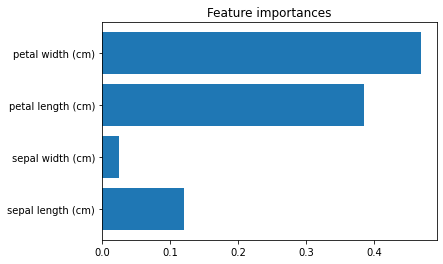

In [85]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), classifier.feature_importances_)
plt.yticks(range(X.shape[1]), X.columns)
plt.show()